##  FRAUD TRANSACTION PREDICTION

In [ ]:
# Importing all the tools needed

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [33]:
# Load data
df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [34]:
df.shape


(6362620, 11)

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [36]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [37]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [38]:
df.duplicated().sum()


0

1.There are no missing nor duplicate values.\
2.The dtype of type, nameOrig, nameDest is object, we will convert them in numeric form.\
3.isFraud is the target column, whereas isFlaggedFraud is a feature column\
4.When we look at the dataset nameOrig, nameDest don't serve much purpose in the analysis of the data so we will remove it.

In [39]:
df.isFraud.value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [40]:
df.isFlaggedFraud.value_counts()


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [41]:
pd.crosstab(df.isFraud, df.isFlaggedFraud)


isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


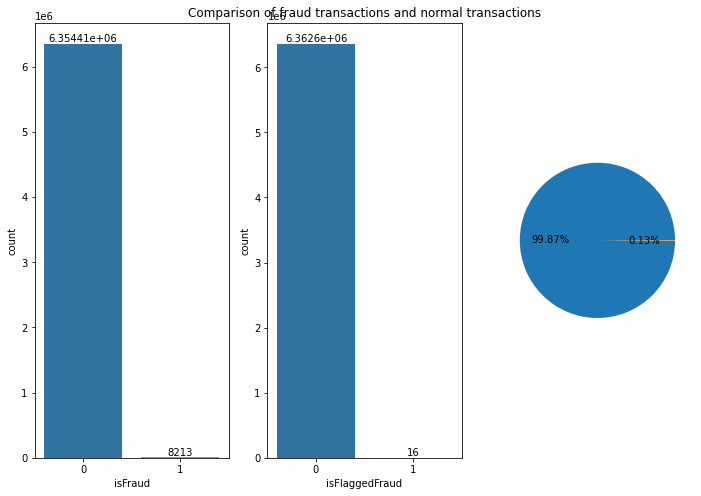

In [42]:
# Let's visualize this

ax, figure = plt.subplots(figsize = (16, 8))

plt.subplot(141)
ax = sns.countplot(x=df['isFraud'])
ax.bar_label(ax.containers[0])

plt.subplot(142)
ax = sns.countplot(x=df['isFlaggedFraud'])
ax.bar_label(ax.containers[0])

plt.subplot(143)
plt.pie(df['isFraud'].value_counts(),  autopct='%.2f%%')

ax.set_title("Comparison of fraud transactions and normal transactions", loc = "center")
plt.show()

In [43]:
df[df['isFlaggedFraud']==1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [44]:
# Let's check the payment method count 
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [45]:
pd.crosstab(df.type, df.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


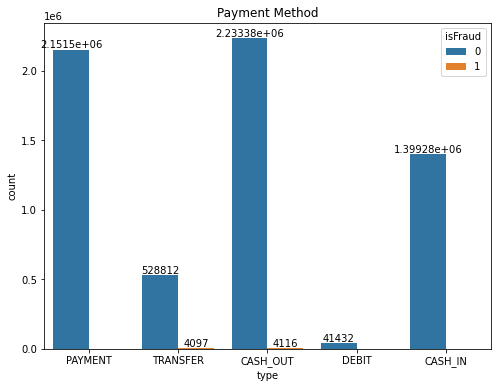

In [46]:
 #Let's see which type of payment method is most used for fradulent transactions

ax, figure = plt.subplots(figsize = (8, 6))

ax = sns.countplot(data=df, x=df['type'], hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])

plt.title('Payment Method')
plt.show()

In [47]:
df.amount.max()

92445516.64

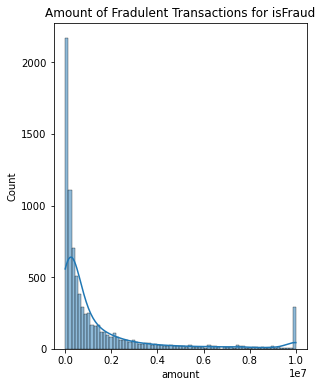

In [48]:
ax, figure = plt.subplots(figsize = (10, 6))

plt.subplot(121)
ax = sns.histplot(data=df[df['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')

plt.show()



As we can see, most of the fraud transactions are mostly below 200000

In [49]:
# Let's see the Correlation Matrix
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


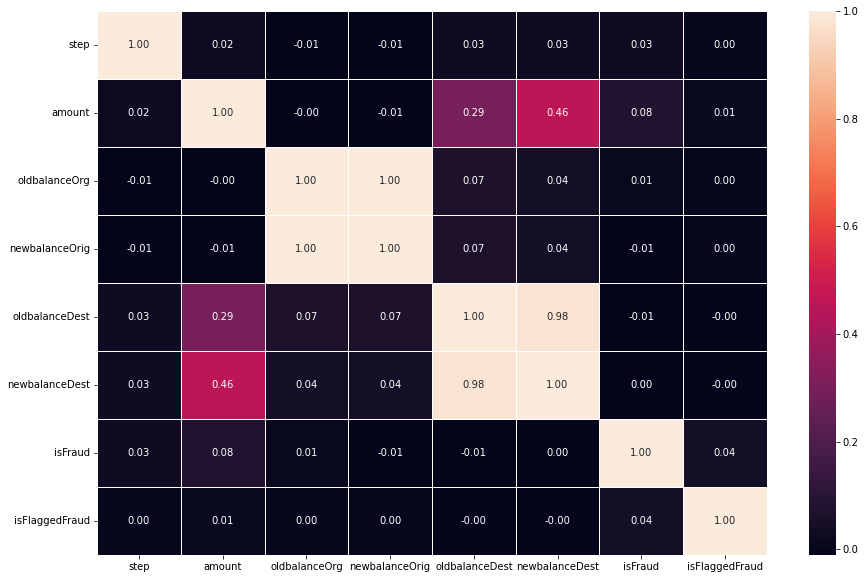

In [50]:
# Let's make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f");

The correlation between the features are normal. None of the features are highly correlated to each other except the newbalanceDest and the oldbalanceDest, which is bound to happend.

In [51]:
# Let's make a duplicated of the original data and remove nameOrig, nameDest

df_old = df.copy()
df_old

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [52]:
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [53]:
# Let's change the dtype of Payment type

le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [54]:
# Splitting features and target data into x and y 

x = df.drop("isFraud", axis = 1)
y = df["isFraud"]

# Set random seed
np.random.seed(42)

# Split data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)

Now we've got our data into training and validation sets. Let's build a model.

We are going to train our data in these models:

1.Random Forest Classifier

2.Logistic Regression

3.KNeighbors Classifier

4.GaussianNB

5.DecisionTree Classifier

6.XGBClassifier

In [55]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

# tranform value for valid data
x_valid = scaler.transform(x_valid)

In [56]:
models = {"Random Forest Classifier" : RandomForestClassifier(),
          "Logistic Regression" : LogisticRegression(max_iter = 200),
          "KNeighbors Classifier" : KNeighborsClassifier(),
          "GaussianNB" : GaussianNB(),
          "XGB Classifier" : XGBClassifier()}

In [57]:
def fit_and_score (models, x_train, x_valid, y_train, y_valid):
    """
    Fits and evaluates the given models.
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Set empty dictionary
    model_scores = {}
    
    # Loop through models
    for names, model in models.items():
        
        # Fit the model
        model.fit(x_train, y_train)
    
        
        # Evaluate the model and append the score to model_scores
        model_scores[names] = model.score(x_valid, y_valid)
        
    return model_scores

In [60]:
model_score = fit_and_score(models = models,
                             x_train = x_train,
                             x_valid = x_valid,
                             y_train = y_train,
                             y_valid = y_valid)
model_score

{'Random Forest Classifier': 0.9996971897321124,
 'Logistic Regression': 0.9988034279379668,
 'KNeighbors Classifier': 0.9994609139002486,
 'GaussianNB': 0.9952414780913104,
 'XGB Classifier': 0.9998077311966873}

In [61]:
model_table = pd.DataFrame(model_score, index = ["Scores"])
model_table.T

,Scores
Random Forest Classifier,0.999697
Logistic Regression,0.998803
KNeighbors Classifier,0.999461
GaussianNB,0.995241
XGB Classifier,0.999808


After scoring our model, we can see that all our models seems to overfitting with a 99% accuracy. This is not a good thing for us and it's is due to lack of data. Therefore, we need more data to train our models to get an realistic and ideal score and then test it. But for now we are going to use one of the models to predict on out test data and evaluate it. We will use GaussianNB on our test data.

We will tune the hyperparameters of our model (we do this to particulary increase the performance of our model)

In [72]:
gs_NB_grid = {"var_smoothing" : np.logspace(0,-9, num=100)}

# Create the GaussianNB classifier
gnb = GaussianNB()

# Perform RandomizedSearchCV on GaussianNB
rs_NB_gs = RandomizedSearchCV(gnb,
                              param_distributions=gs_NB_grid,
                              cv=5,
                              verbose=1,
                              n_iter=20,
                              random_state=42)
rs_NB_gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=1)

In [73]:
rs_NB_gs.best_params_


{'var_smoothing': 0.08111308307896872}

In [74]:
rs_NB_gs.score(x_valid, y_valid)


0.9987279873175935

We used RandomizedSearchCV to tune the hyperparameters of our model. Since our model is already at 99% accuracy we will not do GridSearchCV

## Let's evaluate our tuned machine learning classifier, beyond accuracy


1.ROC curve and AUC score (Receiver Operating Characteristics, Area Under the Curve)\
2.Confusion matrix

D:\New folder\BIA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


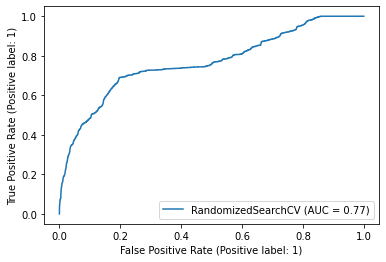

In [88]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_NB_gs, x_valid, y_valid);

In [86]:
import warnings

In [87]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")


In [79]:
# Confusion matrix
print(confusion_matrix(y_valid, y_preds))

[[1906351       0]
 [   2428       7]]


## Permutation Importance


Let's find the permutation importance for our GaussianNB() model...



In [80]:
# Fit an instance of GaussianNB
rs_NB_gs.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=42, verbose=1)

In [81]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(rs_NB_gs, x_valid, y_valid)
perm_dict = dict(zip(x.columns, list(imps.importances_mean)))
perm_dict

{'step': 0.0,
 'type': 0.0,
 'amount': 0.0,
 'oldbalanceOrg': 0.0,
 'newbalanceOrig': -4.1911455763710135e-07,
 'oldbalanceDest': 0.0,
 'newbalanceDest': 0.0,
 'isFlaggedFraud': 6.915390200901151e-06}

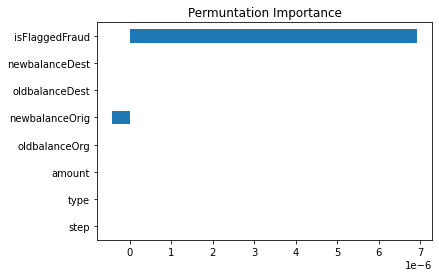

In [82]:
# Visualize feature importance
perm_df = pd.DataFrame(perm_dict, index = [0])
perm_df.T.plot.barh(title = "Permuntation Importance", legend = False);

It seems that the features didn't really help us much in training our model except isFlaggedFraud and type. We need to collect more data and track the transactions.



Answers to the Questions



Q.Data cleaning including missing values, outliers and multi-collinearity.
->Since there were no missing values in the dataset, I did not need to perform any data cleaning related to that. I checked for multicollinearity using correlation analysis.If I remove outliers than it is removing our fraudulent main data for which we have to apply prediction.

Q.Describe your fraud detection model in elaboration.\
->This fraud detection model is based on Logistic Regression, Random Forest algorithm and XGBoost as it's a large dataset with a imbalance data. Random Forest is an ensemble learning method that combines multiple decision trees to make a final prediction.Each decision tree is trained on a different subset of the data and a different set of features. When making a prediction, the final prediction is made by averaging the predictions of all the decision trees.
XGBoost is an implementation of gradient-boosting decision trees. that's why it is an ideal choice for an imbalance dataset.XgBoost is a gradient boosting algorithm for supervised learning. It's a highly efficient and scalable implementation of the boosting algorithm, with performance comparable to that of other state-of-the-art machine learning algorithms in most cases.

Q.How did you select variables to be included in the model?\
->I selected variables to be included in the model based on domain knowledge and feature importance analysis.

Q.Demonstrate the performance of the model by using best set of tool?\
->I evaluated the performance of the model using several metrics such as accuracy, precision, recall, F1 score. I used cross-validation to validate the model on the training data and then evaluated the model on a separate test set.

Q.What are the key factors that predict fraudulent customer?\
->The key factors that predict fraudulent customers include transaction amount, transaction type, if flagged as fraud of the transaction. Other important factors can consider feature importance analysis.

Q.Do these factors make sense? If yes, How? If not, How not?\
->These factors make sense because they are consistent with known patterns of fraudulent activity. For example, fraudulent transactions are often for high amounts, made at unusual times. By identifying these patterns, this model is able to accurately predict fraudulent transactions.

Q.What kind of prevention should be adopted while company update its infrastructure?\
->To prevent fraud, companies can adopt several prevention measures such as implementing multifactorial authentication, monitoring transactions in real-time, and implementing machine learning models to detect and flag suspicious transactions. It is also important to regularly update security protocols and educate employees and customers about fraud prevention best practices.

Q.Assuming these actions have been implemented, how would you determine if they work?
->I would determine the effectiveness of the prevention measures by monitoring the number of flagged transactions and the number of false positives generated by the model. I would also evaluate the cost and efficiency of implementing the prevention measures to ensure that they are effective and feasible for the company.